In [1]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from ForumParsingTools import *

In [2]:
agora_df1 = pd.read_csv('data/agora_stats.out', sep=",")
agora_df1 = agora_df1.drop(columns=['rid', 'speed_download', 'total_time'])

In [3]:
agora_df1['timestamp'] = agora_df1['timestamp'].apply(pd.to_datetime)

In [4]:
agora_df1

,sitename,siteup,timestamp,httpcode
0,Agora,1,2014-04-23 15:04:03,404
1,Agora,1,2014-04-23 15:15:05,404
2,Agora,1,2014-04-23 15:40:17,404
3,Agora,1,2014-04-23 15:45:03,404
4,Agora,1,2014-04-23 16:00:05,404
...,...,...,...,...
599388,Agora Forums,1,2017-03-25 22:34:01,503
599389,Agora Forums,1,2017-03-25 22:35:15,503
599390,Agora Forums,1,2017-03-25 22:40:20,503
599391,Agora Forums,1,2017-03-25 22:45:35,503


In [5]:
def fixIsUp(s):
    if(int(s) != 200):
        return 0
    else:
        return 1

In [6]:
agora_df1['siteup'] = agora_df1['httpcode'].apply(fixIsUp)

In [8]:
def truncateTime(t):
    return t.round(freq='D')

In [9]:
agora_df1['timestamp'] = agora_df1['timestamp'].apply(truncateTime)

In [10]:
agora_subdf1 = agora_df1[agora_df1['sitename'] == "Agora"]
forum_subdf1 = agora_df1[agora_df1['sitename'] == "Agora Forums"]

In [11]:
agora_subdf1 = agora_subdf1.groupby(by='timestamp').mean()
forum_subdf1 = forum_subdf1.groupby(by='timestamp').mean()

In [12]:
forum_subdf1.groupby(by='timestamp').describe()

siteup                                                        \
            count      mean std       min       25%       50%       75%   
timestamp                                                                 
2014-04-24    1.0  1.000000 NaN  1.000000  1.000000  1.000000  1.000000   
2014-04-25    1.0  1.000000 NaN  1.000000  1.000000  1.000000  1.000000   
2014-04-26    1.0  1.000000 NaN  1.000000  1.000000  1.000000  1.000000   
2014-04-27    1.0  0.989583 NaN  0.989583  0.989583  0.989583  0.989583   
2014-04-28    1.0  1.000000 NaN  1.000000  1.000000  1.000000  1.000000   
...           ...       ...  ..       ...       ...       ...       ...   
2017-03-22    1.0  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
2017-03-23    1.0  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
2017-03-24    1.0  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
2017-03-25    1.0  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
2017-03-26    1.0  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   

                     httpcode                                                  \
                 max    count       mean std        min        25%        50%   
timestamp                                                                       
2014-04-24  1.000000      1.0  200.00000 NaN  200.00000  200.00000  200.00000   
2014-04-25  1.000000      1.0  200.00000 NaN  200.00000  200.00000  200.00000   
2014-04-26  1.000000      1.0  200.00000 NaN  200.00000  200.00000  200.00000   
2014-04-27  0.989583      1.0  203.15625 NaN  203.15625  203.15625  203.15625   
2014-04-28  1.000000      1.0  200.00000 NaN  200.00000  200.00000  200.00000   
...              ...      ...        ...  ..        ...        ...        ...   
2017-03-22  0.000000      1.0  503.00000 NaN  503.00000  503.00000  503.00000   
2017-03-23  0.000000      1.0  503.00000 NaN  503.00000  503.00000  503.00000   
2017-03-24  0.000000      1.0  503.00000 NaN  503.00000  503.00000  503.00000   
2017-03-25  0.000000      1.0  503.00000 NaN  503.00000  503.00000  503.00000   
2017-03-26  0.000000      1.0  503.00000 NaN  503.00000  503.00000  503.00000   

                                  
                  75%        max  
timestamp                         
2014-04-24  200.00000  200.00000  
2014-04-25  200.00000  200.00000  
2014-04-26  200.00000  200.00000  
2014-04-27  203.15625  203.15625  
2014-04-28  200.00000  200.00000  
...               ...        ...  
2017-03-22  503.00000  503.00000  
2017-03-23  503.00000  503.00000  
2017-03-24  503.00000  503.00000  
2017-03-25  503.00000  503.00000  
2017-03-26  503.00000  503.00000  

[1053 rows x 16 columns]

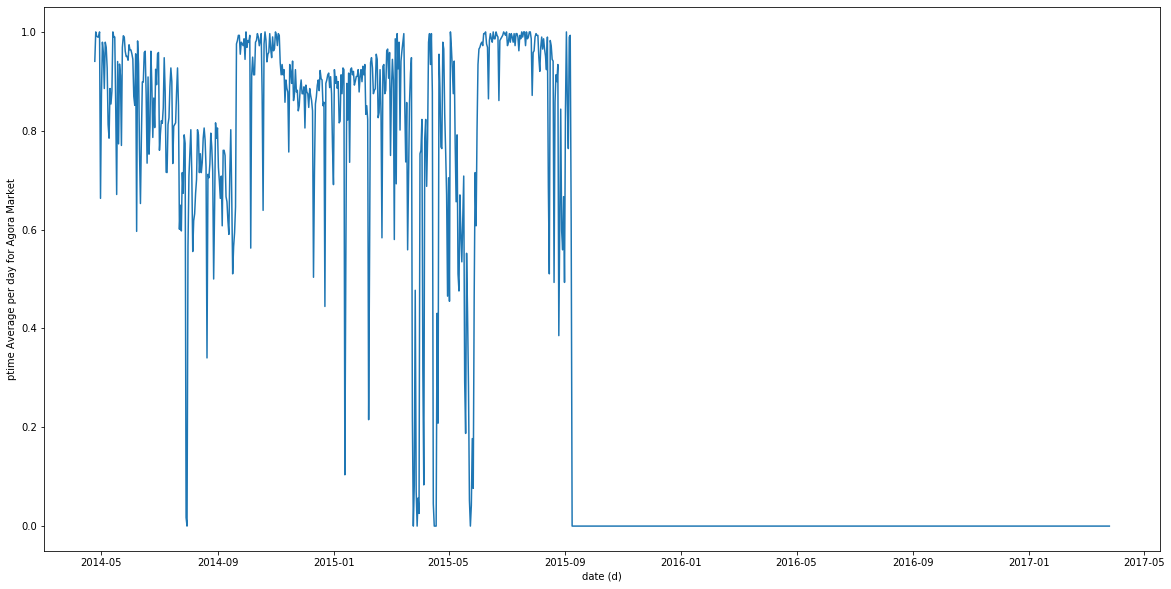

In [65]:
fig, ax1 = plt.subplots( figsize=(20,10))

ax1.set_xlabel('date (d)')
ax1.set_ylabel('ptime Average per day for Agora Market')
ax1.plot(agora_subdf1.index, agora_subdf1['siteup'])
ax1.tick_params(axis='y')
plt.show()

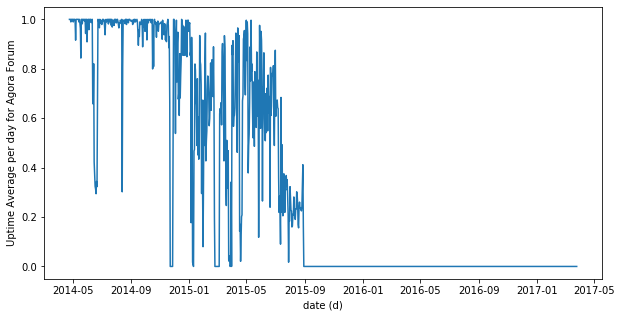

In [70]:
fig, ax1 = plt.subplots( figsize=(10,5))

ax1.set_xlabel('date (d)')
ax1.set_ylabel('Uptime Average per day for Agora Forum')
ax1.plot(forum_subdf1.index, forum_subdf1['siteup'])
ax1.tick_params(axis='y')

plt.show()

In [67]:
date_range = pd.date_range(start='2014-11-01', end='2014-12-01', freq='D')

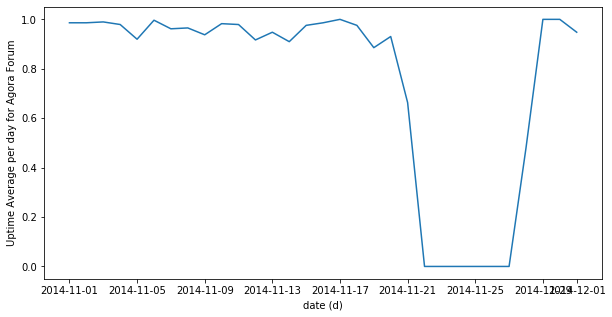

In [71]:
fig, ax1 = plt.subplots( figsize=(10,5))

ax1.set_xlabel('date (d)')
ax1.set_ylabel('Uptime Average per day for Agora Forum')
ax1.plot(forum_subdf1.loc[date_range].index, forum_subdf1['siteup'][date_range])
ax1.tick_params(axis='y')

plt.show()

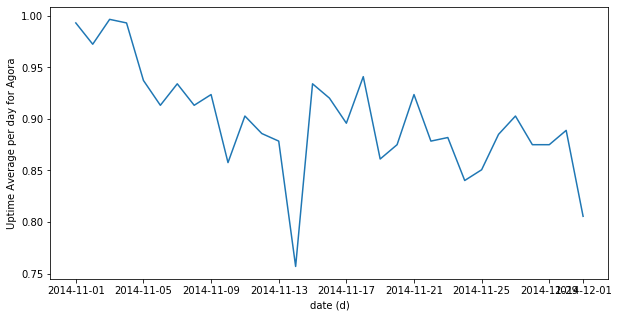

In [69]:
fig, ax1 = plt.subplots( figsize=(10,5))

ax1.set_xlabel('date (d)')
ax1.set_ylabel('Uptime Average per day for Agora')
ax1.plot(agora_subdf1.loc[date_range].index, agora_subdf1['siteup'][date_range])
ax1.tick_params(axis='y')
plt.show()